In [18]:
# Random Spiral Fractals
# FB36 - 20130929
import math
import random
from collections import deque
from PIL import Image
imgx = 1440; imgy = 900
image = Image.new("RGB", (imgx, imgy))
pixels = image.load()
xa = -1.5; xb = 1.5; ya = -1.5; yb = 1.5 # view
n = random.randint(2, 9) # of spiral arms
a = 2.0 * math.pi / n # angle between arms
t = 2.0 * math.pi * random.random() # rotation angle of central copy
r1 = 0.1 * random.random() + 0.1 # scale factor of outmost copies of the spiral arms
r0 = 1.0 - r1 # scale factor of central copy
ts = math.sin(t) * r0; tc = math.cos(t) * r0
maxIt = 64 # max number of iterations allowed
for ky in range(imgy):
     #print( str(100 * ky / (imgy - 1)).zfill(3) + "%")
    for kx in range(imgx):
        x = float(kx) / (imgx - 1) * (xb - xa) + xa
        y = float(ky) / (imgy - 1) * (yb - ya) + ya
        queue = deque([])
        queue.append((x, y, 0))
        while len(queue) > 0: # iterate points until none left
            (x, y, i) = queue.popleft()
            # apply all (inverse) IFS transformations
            for k in range(n + 1): # n outmost copies + central copy
                if k == n: # central copy
                    # inverse rotation and scaling
                    xnew = (y + x * tc / ts) / (ts + tc * tc / ts)
                    ynew = (y - x / tc * ts) / (tc + ts / tc * ts)
                else: # outmost copies on the spiral arms
                    c = k * a # angle
                    # inverse scaling and translation
                    xnew = (x - math.cos(c)) / r1
                    ynew = (y - math.sin(c)) / r1
                if xnew >= xa and xnew <= xb and ynew >= ya and ynew <= yb:
                    if i + 1 == maxIt: break
                    queue.append((xnew, ynew, i + 1))
        pixels[kx, ky] = (i % 16 * 16 , i % 8 * 32, i % 4 * 64)
#image.save("RandomSpiralFractal_" + str(n) + ".png", "PNG")
print(image)

<PIL.Image.Image image mode=RGB size=1440x900 at 0x54B7668>


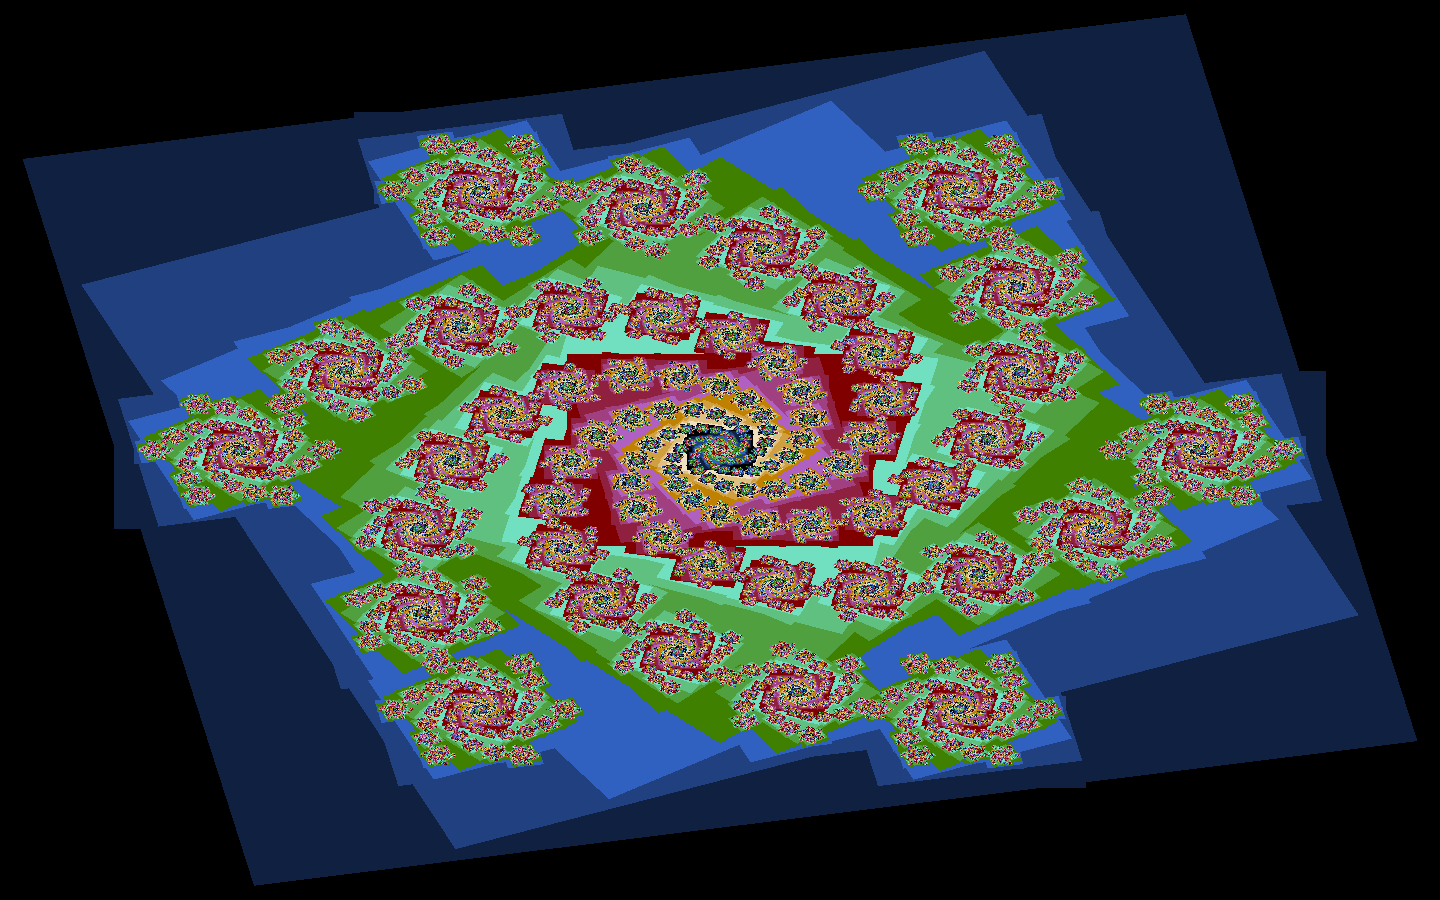

In [19]:
image

In [25]:
%%time
import math
import random
from PIL import Image
imgx = 256; imgy = 256; imgz = 256
image = Image.new("RGB", (imgx, imgy))
pixels = image.load()
print ("Creating voxels...")
# each voxel can have RGB color
voxelRGB = [[[(0, 0, 0) for x in range(imgx)] for y in range(imgy)] for z in range(imgz)]
# each voxel can have an opacity coefficient 0 or 1 (for simplicity)
opacity = [[[0 for x in range(imgx)] for y in range(imgy)] for z in range(imgz)]
eye = (imgx / 2.0, imgy / 2.0, -imgz / 2.0)
mx = imgx - 1; my = imgy - 1; mz = imgz - 1
f = 5.0 # roughness

def rnd():
    return (random.random() - .5) * f

def putvoxel(x, y, z, r, g, b):
    global voxelRGB, opacity
    x = int(round(x)); y = int(round(y)); z = int(round(z))
    voxelRGB[z][y][x] = (int(round(r)), int(round(g)), int(round(b)))
    opacity[z][y][x] = 1

def getvoxel(x, y, z):
    return voxelRGB[int(round(z))][int(round(y))][int(round(x))]

def CreatePlasmaCube(): # using non-recursive Diamond-square Algorithm
    global voxelRGB, opacity
    # corners
    for kz in range(2):
        for ky in range(2):
            for kx in range(2):
                putvoxel(mx * kx, my * ky, mz * kz, \
                    random.randint(0, 255), \
                    random.randint(0, 255), \
                    random.randint(0, 255))

    j = -1
    while True:
        j += 1; j2 = 2 ** j
        jx = float(mx) / j2; jy = float(my) / j2; jz = float(mz) / j2
        if jx < 1 and jy < 1 and jz < 1: break
        for m in range(j2):
            z0 = m * jz; z1 = z0 + jz; z = z0 + jz / 2.0        
            for i in range(j2):
                y0 = i * jy; y1 = y0 + jy; y = y0 + jy / 2.0        
                for k in range(j2):
                    x0 = k * jx; x1 = x0 + jx; x = x0 + jx / 2.0
                
                    a = getvoxel(x0, y0, z0); b = getvoxel(x1, y0, z0)
                    c = getvoxel(x0, y1, z0); d = getvoxel(x1, y1, z0)
                    e = getvoxel(x0, y0, z1); f = getvoxel(x1, y0, z1)
                    g = getvoxel(x0, y1, z1); h = getvoxel(x1, y1, z1)

                    # center
                    putvoxel(x, y, z, \
                        (a[0] + b[0] + c[0] + d[0] + e[0] + f[0] + g[0] + h[0]) / 8.0, \
                        (a[1] + b[1] + c[1] + d[1] + e[1] + f[1] + g[1] + h[1]) / 8.0, \
                        (a[2] + b[2] + c[2] + d[2] + e[2] + f[2] + g[2] + h[2]) / 8.0)

                    # centers of 6 faces
                    putvoxel(x, y, z0, \
                        (a[0] + b[0] + c[0] + d[0]) / 4.0, \
                        (a[1] + b[1] + c[1] + d[1]) / 4.0, \
                        (a[2] + b[2] + c[2] + d[2]) / 4.0)
                    putvoxel(x, y, z1, \
                        (e[0] + f[0] + g[0] + h[0]) / 4.0, \
                        (e[1] + f[1] + g[1] + h[1]) / 4.0, \
                        (e[2] + f[2] + g[2] + h[2]) / 4.0)
                    putvoxel(x, y0, z, \
                        (a[0] + b[0] + e[0] + f[0]) / 4.0, \
                        (a[1] + b[1] + e[1] + f[1]) / 4.0, \
                        (a[2] + b[2] + e[2] + f[2]) / 4.0)
                    putvoxel(x, y1, z, \
                        (c[0] + d[0] + g[0] + h[0]) / 4.0, \
                        (c[1] + d[1] + g[1] + h[1]) / 4.0, \
                        (c[2] + d[2] + g[2] + h[2]) / 4.0)
                    putvoxel(x0, y, z, \
                        (a[0] + c[0] + e[0] + g[0]) / 4.0, \
                        (a[1] + c[1] + e[1] + g[1]) / 4.0, \
                        (a[2] + c[2] + e[2] + g[2]) / 4.0)
                    putvoxel(x1, y, z, \
                        (b[0] + d[0] + f[0] + h[0]) / 4.0, \
                        (b[1] + d[1] + f[1] + h[1]) / 4.0, \
                        (b[2] + d[2] + f[2] + h[2]) / 4.0)

                    # centers of 12 edges
                    putvoxel(x, y0, z0, \
                        (a[0] + b[0]) / 2.0 + jx * rnd(), \
                        (a[1] + b[1]) / 2.0 + jx * rnd(), \
                        (a[2] + b[2]) / 2.0 + jx * rnd())
                    putvoxel(x0, y, z0, \
                        (a[0] + c[0]) / 2.0 + jy * rnd(), \
                        (a[1] + c[1]) / 2.0 + jy * rnd(), \
                        (a[2] + c[2]) / 2.0 + jy * rnd())
                    putvoxel(x1, y, z0, \
                        (b[0] + d[0]) / 2.0 + jy * rnd(), \
                        (b[1] + d[1]) / 2.0 + jy * rnd(), \
                        (b[2] + d[2]) / 2.0 + jy * rnd()) 
                    putvoxel(x, y1, z0, \
                        (c[0] + d[0]) / 2.0 + jx * rnd(), \
                        (c[1] + d[1]) / 2.0 + jx * rnd(), \
                        (c[2] + d[2]) / 2.0 + jx * rnd())
                    putvoxel(x, y0, z1, \
                        (e[0] + f[0]) / 2.0 + jx * rnd(), \
                        (e[1] + f[1]) / 2.0 + jx * rnd(), \
                        (e[2] + f[2]) / 2.0 + jx * rnd())
                    putvoxel(x0, y, z1, \
                        (e[0] + g[0]) / 2.0 + jy * rnd(), \
                        (e[1] + g[1]) / 2.0 + jy * rnd(), \
                        (e[2] + g[2]) / 2.0 + jy * rnd())
                    putvoxel(x1, y, z1, \
                        (f[0] + h[0]) / 2.0 + jy * rnd(), \
                        (f[1] + h[1]) / 2.0 + jy * rnd(), \
                        (f[2] + h[2]) / 2.0 + jy * rnd()) 
                    putvoxel(x, y1, z1, \
                        (g[0] + h[0]) / 2.0 + jx * rnd(), \
                        (g[1] + h[1]) / 2.0 + jx * rnd(), \
                        (g[2] + h[2]) / 2.0 + jx * rnd())
                    putvoxel(x0, y0, z, \
                        (a[0] + e[0]) / 2.0 + jz * rnd(), \
                        (a[1] + e[1]) / 2.0 + jz * rnd(), \
                        (a[2] + e[2]) / 2.0 + jz * rnd())
                    putvoxel(x1, y0, z, \
                        (b[0] + f[0]) / 2.0 + jz * rnd(), \
                        (b[1] + f[1]) / 2.0 + jz * rnd(), \
                        (b[2] + f[2]) / 2.0 + jz * rnd())
                    putvoxel(x0, y1, z, \
                        (c[0] + g[0]) / 2.0 + jz * rnd(), \
                        (c[1] + g[1]) / 2.0 + jz * rnd(), \
                        (c[2] + g[2]) / 2.0 + jz * rnd())
                    putvoxel(x1, y1, z, \
                        (d[0] + h[0]) / 2.0 + jz * rnd(), \
                        (d[1] + h[1]) / 2.0 + jz * rnd(), \
                        (d[2] + h[2]) / 2.0 + jz * rnd())

# cx, cy, cz: center; r: radius (in voxels)
def CreateSphere(cx, cy, cz, r):
    global voxelRGB, opacity
    # sphere is set of voxels which have distance = r to center
    for z in range(imgz):
        for y in range(imgy):
            for x in range(imgx):
                dx = x - cx
                dy = y - cy
                dz = z - cz
                d = math.sqrt(dx * dx + dy * dy + dz * dz)
                if abs(d - r) > 1.0:
                    voxelRGB[z][y][x] = (0, 0, 0)
                    opacity[z][y][x] = 0

# Ray Tracer (traces the ray and returns an RGB color)
def RayTrace(rayX, rayY, rayZ, dx, dy, dz):
    while True:
        rayX += dx; rayY += dy; rayZ += dz # move the ray by 1 voxel
        rayXint = int(round(rayX)); rayYint = int(round(rayY)); rayZint = int(round(rayZ))
        # if ray goes outside of the voxel-box
        if rayXint < 0 or rayXint > imgx - 1 \
            or rayYint < 0 or rayYint > imgy - 1 \
            or rayZint < 0 or rayZint > imgz - 1:
            return (0, 0, 0)
        # if ray hits an object
        if opacity[rayZint][rayYint][rayXint] == 1:
            return voxelRGB[rayZint][rayYint][rayXint]

def CreateScene():
    print ("Creating scene...")
    CreatePlasmaCube()
    CreateSphere(imgx / 2.0, imgy / 2.0, imgz / 2, min(imgx / 2.0, imgy / 2.0, imgz / 2))

def RenderScene():
    print ("Rendering scene...")
    for ky in range(imgy):
         #print str(100 * ky / (imgy - 1)).zfill(3) + "%"
        for kx in range(imgx):
            dx = kx - eye[0]
            dy = ky - eye[1]
            dz = 0.0 - eye[2]
            d = math.sqrt(dx * dx + dy * dy + dz * dz)
            dx = dx / d; dy = dy / d; dz = dz / d # ray unit vector
            pixels[kx, ky] = RayTrace(kx, ky, 0, dx, dy, dz)

# MAIN
CreateScene()
RenderScene()
#image.save("RandomPlanet.png", "PNG")
image

Creating voxels...
Creating scene...
Rendering scene...
Wall time: 7min 48s


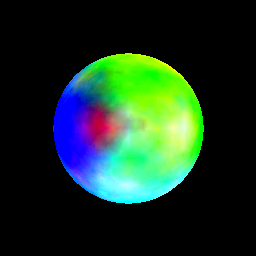

In [26]:
image

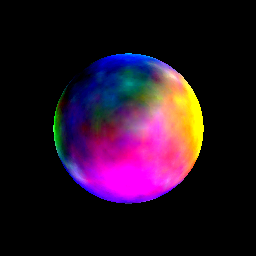

In [24]:
image

13.194942608192942 0.5459289249472468 10


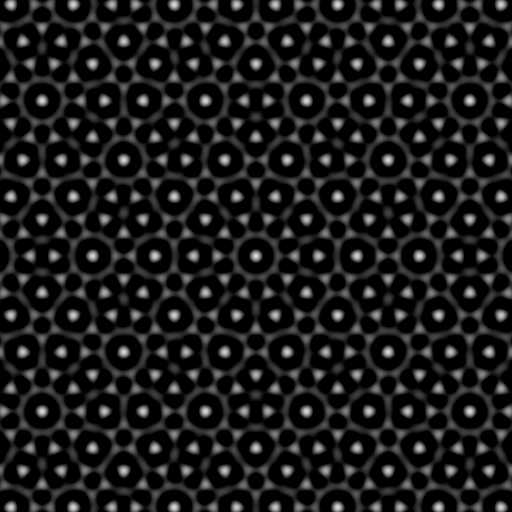

In [29]:
# Quasicrystal Pattern Generator
# https://en.wikipedia.org/wiki/Quasicrystal
# http://mainisusuallyafunction.blogspot.com/2011/10/quasicrystals-as-sums-of-waves-in-plane.html
# FB - 20150808
import math
import random
from PIL import Image
imgx = 512; imgy = 512
image = Image.new("RGB", (imgx, imgy))
pixels = image.load()

f = random.random() * 40 + 10 # frequency
p = random.random() * math.pi # phase
n = random.randint(10, 20) # of rotations
print( f, p, n)

for ky in range(imgy):
    y = float(ky) / (imgy - 1) * 4 * math.pi - 2 * math.pi
    for kx in range(imgx):
        x = float(kx) / (imgx - 1) * 4 * math.pi - 2 * math.pi
        z = 0.0
        for i in range(n):
            r = math.hypot(x, y)
            a = math.atan2(y, x) + i * math.pi * 2.0 / n
            z += math.cos(r * math.sin(a) * f + p)
        c = int(round(255 * z / n))
        pixels[kx, ky] = (c, c, c) # grayscale
image

In [34]:
# Snowflake Simulation Using Reiter Cellular Automata
# Source: "A Local Cellular Model for Snow Crystal Growth" by Cliff Reiter
# FB36 - 20130107
import math
import random
from PIL import Image, ImageDraw
imgx = 500; imgy = 500 # image size
imgx1 = imgx - 1; imgy1 = imgy - 1
image = Image.new("RGB", (imgx, imgy))
draw = ImageDraw.Draw(image)
pixels = image.load()
maxIt = 1000 # of growth steps
# snowflake will differ depending on values of these parameters:
alpha = random.random() * 1.5 + 0.5
beta = random.random() * 0.3 + 0.3
gamma = random.random() * 0.01
mx = 250; my = 250 # width and height of 2DCA
ca = [[beta for x in range(mx)] for y in range(my)]
caRep = [[beta for x in range(mx)] for y in range(my)] # receptive cells
caNRep = [[beta for x in range(mx)] for y in range(my)] # non-receptive cells
dx = [-1, 0, -1, 1, 0, 1]; dy = [-1, -1, 0, 0, 1, 1] # 6 directions to grow
# these are for coloring the image
while True:
    mr0 = 2 ** random.randint(3, 6); mr1 = 256 / mr0
    mg0 = 2 ** random.randint(3, 6); mg1 = 256 / mg0
    mb0 = 2 ** random.randint(3, 6); mb1 = 256 / mb0
    if mr0 != mg0 and mr0 != mb0 and mg0 != mb0: break

ca[int((my - 1) / 2)][int((mx - 1) / 2)] = 1.0 # ice seed
for i in range(maxIt): # growth steps
    print ("Growth Step: " + str(i + 1) + " of " + str(maxIt))
    # separate the array into receptive and non-receptive arrays
    for iy in range(my):
        for ix in range(mx):
            receptive = False
            if ca[iy][ix] >= 1.0: # ice
                receptive = True
            else: # check neighbors
                for j in range(6):
                    jx = ix + dx[j]; jy = iy + dy[j]
                    if jx >= 0 and jx < mx and jy >= 0 and jy < my:
                        if ca[jy][jx] >= 1.0: # ice
                            receptive = True
                            break
            if receptive:
                caRep[iy][ix] = ca[iy][ix] + gamma
                caNRep[iy][ix] = 0.0
            else:
                caRep[iy][ix] = 0.0
                caNRep[iy][ix] = ca[iy][ix]

    # new array: weighed averages of the non-receptive array + receptive array
    for iy in range(my):
        for ix in range(mx):
            wsum = caNRep[iy][ix] * (1.0 - alpha * 6.0 / 12.0)
            for j in range(6): # neighbors
                jx = ix + dx[j]; jy = iy + dy[j]
                if jx >= 0 and jx < mx and jy >= 0 and jy < my:
                    wsum += caNRep[jy][jx] * alpha / 12.0
            ca[iy][ix] = caRep[iy][ix] + wsum

# paint final state of the snowflake
an45 = - math.pi / 4.0
sn45 = math.sin(an45); cs45 = math.cos(an45)
scale = math.sqrt(3.0); ox = imgx1 / 2.0; oy = imgy1 / 2.0
for ky in range(imgy):
    for kx in range(imgx):
        # apply geometric transformation (scaling and rotation)
        tx = kx - ox; ty = (ky - oy) * scale
        tx0 = tx * cs45 - ty * sn45 + ox
        ty = tx * sn45 + ty * cs45 + oy; tx = tx0
        if tx >= 0 and tx <= imgx1 and ty >= 0 and ty <= imgy1:
            c = ca[int((my - 1) * ty / imgy1)][int((mx - 1) * tx / imgx1)]
            if c >= 1.0: # ice
                c = int((c - 1.0) * 255)
                pixels[kx, ky] = (int(c % mr0 * mr1), int(c % mg0 * mg1), int(c % mb0 * mb1))
label = "alpha = " + str(alpha) + " beta = " + str(beta) + " gamma = " + str(gamma)
draw.text((0, 0), label, (0, 255, 0)) # write to top-left using green color
image.save("Snowflake.png", "PNG")

Growth Step: 1 of 1000
Growth Step: 2 of 1000
Growth Step: 3 of 1000
Growth Step: 4 of 1000
Growth Step: 5 of 1000
Growth Step: 6 of 1000
Growth Step: 7 of 1000
Growth Step: 8 of 1000
Growth Step: 9 of 1000
Growth Step: 10 of 1000
Growth Step: 11 of 1000
Growth Step: 12 of 1000
Growth Step: 13 of 1000
Growth Step: 14 of 1000
Growth Step: 15 of 1000
Growth Step: 16 of 1000
Growth Step: 17 of 1000
Growth Step: 18 of 1000
Growth Step: 19 of 1000
Growth Step: 20 of 1000
Growth Step: 21 of 1000
Growth Step: 22 of 1000
Growth Step: 23 of 1000
Growth Step: 24 of 1000
Growth Step: 25 of 1000
Growth Step: 26 of 1000
Growth Step: 27 of 1000
Growth Step: 28 of 1000
Growth Step: 29 of 1000
Growth Step: 30 of 1000
Growth Step: 31 of 1000
Growth Step: 32 of 1000
Growth Step: 33 of 1000
Growth Step: 34 of 1000
Growth Step: 35 of 1000
Growth Step: 36 of 1000
Growth Step: 37 of 1000
Growth Step: 38 of 1000
Growth Step: 39 of 1000
Growth Step: 40 of 1000
Growth Step: 41 of 1000
Growth Step: 42 of 1000
G

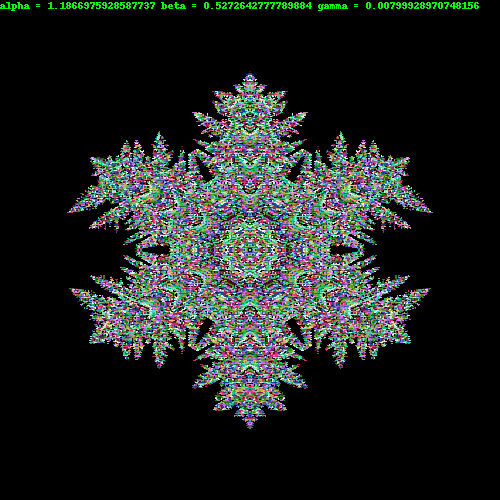

In [35]:
image